# Tarea 1 - Alexandre Poupeau

First, we need to import some useful libraries that we will use in the notebook.

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

## Exercice 1 - Verisimilitude Maximal

The idea is basic. We suppose that all the estimations come from a normal distribution with the same mean but a different variance. So we can write that $Y_i \sim \mathcal{N}(\mu,\,\sigma^{2}_i)$, where $Y_i$ describes the expected estimation of the scientist $i$. In this experience, there $n=7$ scientists that made an estimation.

$l(\mu) = p(data | model) = \displaystyle \prod^n_{i=1} p(data_i|model_i) = \displaystyle \prod^n_{i=1} p(y_i|Y_i \sim \mathcal{N}(\mu,\,\sigma^{2}_i)) = \displaystyle \prod^n_{i=1} \dfrac{1}{\sqrt{2\pi\sigma_i^2}} \exp(-\dfrac{1}{2\sigma_i^2}(y_i-\mu)^2)$

In [154]:
# estimation of the seven scientists
estimations = [-27.020, 3.57, 8.191, 9.898, 9.603, 9.945, 10.056]

Before maximazing $l(\mu)$ we need to find values for each $\sigma_i$ that make sense. In order to achieve that, we are going to compute the sample (or also called empirical) mean and variance.

In [158]:
sample_mean = np.mean(estimations[2:])
sample_variances = (estimations-sample_mean)**2

print("Sample mean (without taking into account the estimation of the first and second scientists) :", sample_mean)
print("Sample variances :", sample_variances)

Sample mean (without taking into account the estimation of the first and second scientists) : 9.538599999999999
Sample variances : [1.33653123e+03 3.56241860e+01 1.81602576e+00 1.29168360e-01
 4.14736000e-03 1.65160960e-01 2.67702760e-01]


In [160]:
def verisimilitude(y, var, mu):
    """
        Calculate the verisimilitude for a given mu.
    
        Arguments:
            y (array) : estimations of the scientists
            sigmas (array) : sample variance for every y_i
            mu (float) : value of the mean in the normal distributions.
    
        Returns:
            l_mu (float) : Verisimilitude
    """
    l_mu = 1
    for y_i, var_i in zip(y, var):
        l_mu *= (1/np.sqrt(2*np.pi*var_i))*np.exp(-(1/(2*var_i))*(y_i-mu)**2)
    return l_mu

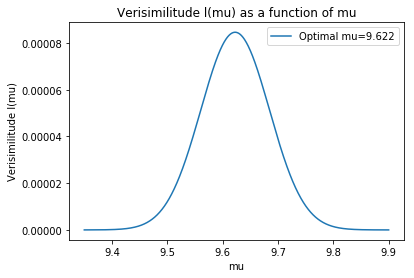

In [194]:
mu_array = np.linspace(9.35, 9.9, 1000)

l_mu_stock = list()
for mu in mu_array:
    l_mu_stock.append([mu, verisimilitude(estimations, sample_variances, mu)])
l_mu_stock = np.array(l_mu_stock)

optimal_mu = l_mu_stock[np.argmax(l_mu_stock[:, 1]), 0]
    
plt.plot(l_mu_stock[:, 0], l_mu_stock[:, 1])
# plt.axvline(x=optimal_mu)
plt.title("Verisimilitude l(mu) as a function of mu")
plt.xlabel("mu")
plt.ylabel("Verisimilitude l(mu)")
plt.legend(["Optimal mu="+str(int(optimal_mu*1000)/1000)], loc="best")
plt.show()

## Exercice 2 - Lineal Regresion

### a) Load and display data

In [96]:
# import the data
data = np.genfromtxt("https://raw.githubusercontent.com/GAMES-UChile/Curso-Aprendizaje-de-Maquinas/master/datos/szege_clima.csv",
                     delimiter=',',
                     skip_header=1)
dataframe = pd.DataFrame(data)
dataframe.columns = ["Humidity", "ThermSens"]
print("Sample of the dataset :\n", dataframe.head(), "\n")

# ambient humidity X
X = np.array(dataframe.loc[:,"Humidity"].values)
mean_X = np.mean(X)
variance_X = np.var(X)
print("Mean X =", mean_X, ", Variance X=", variance_X)

# thermical sensation Y
Y = np.array(dataframe.loc[:,"ThermSens"].values)
mean_Y = np.mean(Y)
variance_Y = np.var(Y)
print("Mean Y =", mean_Y, ", Variance Y=", variance_Y)

Sample of the dataset :
    Humidity  ThermSens
0      0.96   9.355556
1      0.77  10.533333
2      0.53  17.722222
3      0.68  21.116667
4      0.79  10.116667 

Mean X = 0.7278625 , Variance X= 0.02996880609375
Mean Y = 12.972625000000003 , Variance Y= 37.13178540875772


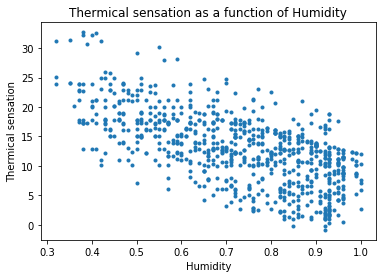

In [97]:
# display the data to get a better idea of what we are working with
plt.plot(X, Y, ".")
plt.title("Thermical sensation as a function of Humidity")
plt.xlabel("Humidity")
plt.ylabel("Thermical sensation")
plt.show()

### b) Model creation

In [98]:
percent_train = 0.8
size_dataset = len(data)

# divide input train and test
X_train = X[:int(size_dataset*percent_train)]
X_test = X[int(size_dataset*percent_train):]

# divide output train and test
Y_train = Y[:int(size_dataset*percent_train)]
Y_test = Y[int(size_dataset*percent_train):]

In [99]:
# create different values of p
p_array = np.linspace(0, 500, 100)

We are going to implement a lineal regression model with ridge regularization.

In [113]:
def reg_lineal(X, Y, p):
    """
        Returns the optimal parameter theta for the lineal regression.
        
        Arguments:
            X (array): training input
            Y (array): training output
            p (float): parameter to control the impact of the regularization
        
        Returns:
            theta_opt (array) : optimal parameter 
    """
    X1 = np.vstack([X,np.ones_like(X)]).T
    
    array_tmp = np.matmul(X1.T, Y)
    mat_tmp = np.matmul(X1.T, X1)
    # regularization
    mat_tmp += p*np.identity(mat_tmp.shape[0])
    
    theta = np.matmul(np.linalg.inv(mat_tmp), array_tmp)
    return theta

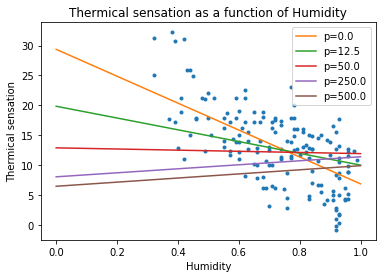

In [143]:
# smart p array contains the most diverse and interesting values of p
smart_p_array = [np.min(p_array), np.quantile(p_array, 0.025), np.quantile(p_array, 0.1), np.median(p_array), np.max(p_array)]

# plot
plt.plot(X_test, Y_test, ".")
for p in div_p_array:
    theta = reg_lineal(X, Y, p)
    
    a, b = theta[0], theta[1]
    
    # plot the optimal lineal solution
    plt.plot([b, a+b], label="p="+str(p))
    plt.title("Thermical sensation as a function of Humidity")
    plt.xlabel("Humidity")
    plt.ylabel("Thermical sensation")
plt.legend()
plt.show()

### c) Coefficients with different p

Now we are going to plot the value of the parameters a,b (where $\theta = [a, b]$) given different values of $\rho$. a represents the slope and b the intercept.

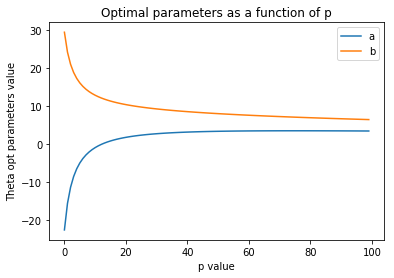

In [127]:
# stock the optimal parameters for all p
stock = list()
for p in p_array:
    stock.append(reg_lineal(X, Y, p))
stock = np.array(stock)

plt.plot(stock[:,0], label="a")
plt.plot(stock[:,1], label="b")
plt.title("Optimal parameters as a function of p")
plt.xlabel("p value")
plt.ylabel("Theta opt parameters value")
plt.legend()
plt.show()

### Mean Squared error and variance

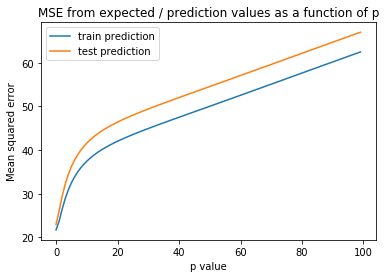

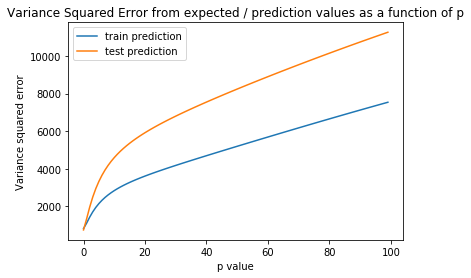

In [152]:
stock_mse_pred = list()
stock_var_pred = list()
for p in p_array:
    # calculate the optimal params
    theta = reg_lineal(X_train, Y_train, p)
    a, b = theta[0], theta[1]
    
    # prediction for test and train data
    Y_train_pred = a*X_train + b
    Y_test_pred = a*X_test + b
    
    # squared error
    se_train_pred = (Y_train_pred-Y_train)**2
    se_test_pred = (Y_test_pred-Y_test)**2

    # mean squared error
    mse_train_pred = np.mean(se_train_pred)
    mse_test_pred = np.mean(se_test_pred)

    # variance
    variance_train_pred = np.var(se_train_pred)
    variance_test_pred = np.var(se_test_pred)
    
    # stock
    stock_mse_pred.append([mse_train_pred, mse_test_pred])
    stock_var_pred.append([variance_train_pred, variance_test_pred])
stock_mse_pred = np.array(stock_mse_pred)
stock_var_pred = np.array(stock_var_pred)
    
# graph of mse predictions of train and test elements
plt.plot(stock_mse_pred[:, 0], label="train prediction")
plt.plot(stock_mse_pred[:, 1], label="test prediction")
plt.title("MSE from expected / prediction values as a function of p")
plt.xlabel("p value")
plt.ylabel("Mean squared error")
plt.legend()
plt.show()

# graph of vse predictions of train and test elements
plt.plot(stock_var_pred[:, 0], label="train prediction")
plt.plot(stock_var_pred[:, 1], label="test prediction")
plt.title("Variance Squared Error from expected / prediction values as a function of p")
plt.xlabel("p value")
plt.ylabel("Variance squared error")
plt.legend()
plt.show()

### Discussion and conclusion

## Exercice 3 - Project